In [2]:
import pandas as pd
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open("컬처케어실습.pkl", "rb") as f:
    df = pickle.load(f)
df

,review,tagged_review,cluster
0,노키즈존 세 이하 입장 불가 일요일 간만에 일찍 아점 먹고낮잠 쿨쿨 자다가뽈뽈부부...,"[노, 키즈, 존, 세, 이하, 입장, 불가, 일요일, 간만, 일찍, 점, 먹다, ...",3
1,쉬냐 너 모르냐 오늘 빼빼로데이 잖아 우왓 퀸 퀸 스페이드는 놀래켰는데 역시 얼음왕...,"[쉬다, 모르다, 오늘, 빼빼로데이, 잖다, 우왓, 퀸, 퀸, 스, 페이, 들다, ...",4
2,같아서 언이를 불러 필름카메라를 찍기로 했다 아침 일찍부터 일어나서 박콩님 산책 시...,"[불다, 필름, 카메라, 찍기, 아침, 일찍, 일어나서, 박콩, 산책, 일찍, 일어...",4
3,표지는 글 분위기랑 안 어울리게 너무 강렬해서벽 뒤로 슬그머니 피해야할 것 같았다...,"[표지, 글, 분위기, 안, 어울리다, 강렬하다, 벽, 뒤, 슬그머니, 피해, 야하...",1
4,쉽지 않다 은셔랑 이번에 한국와서 제일 친해짐 생각난 김에 은서랑 아이스크림 사먹으...,"[쉬다, 않다, 은셔, 한국, 서다, 제일, 친해지다, 생각나다, 김, 은서, 아이...",1
...,...,...,...
725,트센터 위 포스터를 클릭하시면 해당 공연 예매 사이트로 바로 이동합니다 OPEN F...,"[트, 센터, 위, 포스터, 클릭, 해당, 공연, 예매, 사이트, 이동, 마침표, ...",3
726,지엄 겨울 방학 정규 수업 후 모처럼 마르첼로 바렌기전 수업에 다녀왔습니다 친구들과...,"[지엄, 겨울, 방학, 정규, 수업, 후, 모처럼, 마르첼, 바렌, 기전, 수업, ...",3
727,울아트센터 어쩌면 처음 보는 예술 놀라움을 넘어 서늘함을 전하는이 여름에 특별한 피...,"[아트, 센터, 어쩌면, 처음, 보다, 예술, 움, 넘다, 서늘하다, 전, 여름, ...",4
728,장 기다렸던 전시 르네 마그리트 특별전 드디어 다녀왔다 비록 원화는 없었지만 멀티미...,"[장, 기다리다, 전시, 르, 마그리트, 특별, 전, 다녀오다, 원화, 없다, 멀티...",1


In [4]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [6]:
df_cluster0 = df[df["cluster"]==0]

In [9]:
# 단어사전 구축
all_docs = list(df_cluster0["tagged_review"])
dictionary = Dictionary(all_docs)
len(dictionary.token2id)

10301

In [10]:
# 구축된 단어사전을 이용해서 BOW 실시
corpus = []
for doc in all_docs:
    corpus.append(dictionary.doc2bow(doc))
len(corpus)

115

In [11]:
topic_num = 3

ldamodel = models.LdaModel(corpus, num_topics=topic_num, id2word=dictionary)

In [12]:
# 문서별 topic 확률 확인
for i in range(len(corpus)):
    print(ldamodel.get_document_topics(corpus[i]))

[(0, 0.15887482), (1, 0.8404269)]
[(0, 0.9765011), (1, 0.022952178)]
[(0, 0.5967234), (1, 0.40245372)]
[(0, 0.033842757), (1, 0.9650946)]
[(0, 0.5328798), (1, 0.46616)]
[(0, 0.998646)]
[(0, 0.22725932), (1, 0.7720416)]
[(1, 0.6425009), (2, 0.3568553)]
[(0, 0.9984079)]
[(2, 0.9977701)]
[(0, 0.99673194)]
[(1, 0.99738395)]
[(0, 0.2193765), (1, 0.775182)]
[(2, 0.99809796)]
[(2, 0.996534)]
[(0, 0.99267477)]
[(1, 0.99873346)]
[(0, 0.9842185), (2, 0.011317486)]
[(0, 0.10312689), (1, 0.8702841), (2, 0.026589042)]
[(0, 0.99857783)]
[(0, 0.9101594), (1, 0.089034654)]
[(0, 0.3109438), (1, 0.01954974), (2, 0.6695065)]
[(0, 0.038172916), (2, 0.9610926)]
[(0, 0.998708)]
[(0, 0.15688193), (1, 0.8423649)]
[(0, 0.99873334)]
[(0, 0.8867728), (1, 0.11251969)]
[(1, 0.96890616), (2, 0.030329918)]
[(0, 0.9986248)]
[(1, 0.99854946)]
[(0, 0.18221977), (1, 0.7942497), (2, 0.023530472)]
[(0, 0.18556233), (2, 0.8137034)]
[(2, 0.99895006)]
[(1, 0.9981117)]
[(0, 0.056587428), (2, 0.942608)]
[(0, 0.2827479), (1, 0.

In [13]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# coherence_model 만들어서 체크 : 토픽 개수를 3개로 설정했을때의 점수

top_n = 3

#perplexity
perplexity_score = ldamodel.log_perplexity(corpus)

#Coherence
coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=top_n)
coherence_score = coherence_model.get_coherence()


print('Perplexity score :', perplexity_score)
print('Coherence score :', coherence_score)

Perplexity score : -8.483345819029918
Coherence score : 0.6052886563221509


In [15]:
perplexity_values=[]

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_v = ldamodel.log_perplexity(corpus)
    perplexity_values.append(perplexity_v)

Text(0, 0.5, 'Perplexity score')

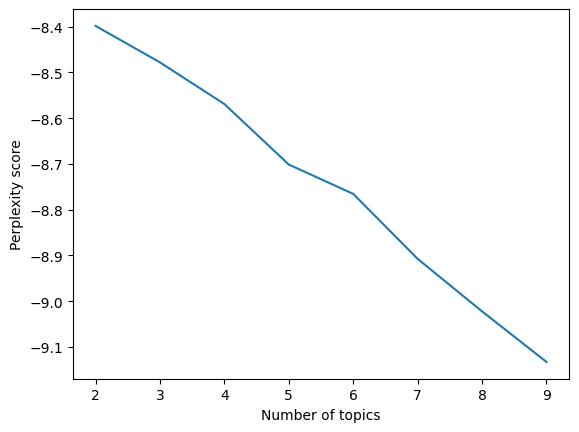

In [16]:
#라인 그래프 만들기

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity score')

In [17]:
coherence_values = []
for i in tqdm(range(2,10)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model = CoherenceModel(model=ldamodel, texts=all_docs, dictionary=dictionary, topn=i)
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

100%|██████████| 8/8 [01:01<00:00,  7.73s/it]


Text(0, 0.5, 'Coherence score')

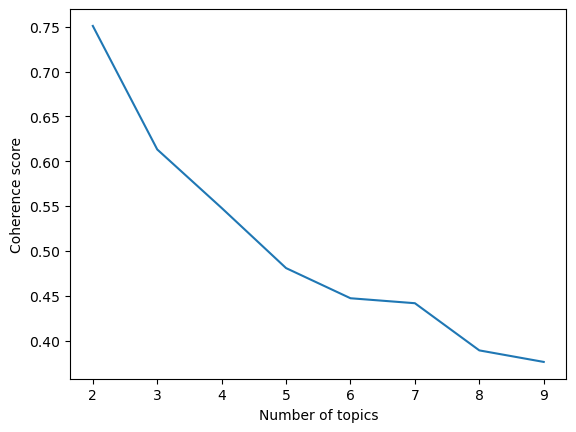

In [18]:
#라인 그래프 만들기

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')

In [19]:
topic_num = 5
ldamodel = gensim.models.LdaModel(corpus, num_topics=topic_num, id2word = dictionary,random_state=1, passes=5)

In [20]:
#document에 대한 label(action number)
#documentdp 대한 probability
# 두개를 가지고 가장 높은 확률값을 가진 action number 찾기

action_align = []

for doc in tqdm(ldamodel.get_document_topics(corpus)):
    label = []
    value = []
    for score in doc:
        label.append(score[0]) #토픽(=action N)
        value.append(score[1]) #토픽의 확률

    max_index = np.argmax(value)   #argmax 함수는 리스트에서 가장 max값 을 가진 인덱스를 반환
    action_n = label[max_index]
    action_align.append(action_n)

100%|██████████| 115/115 [00:00<00:00, 3208.81it/s]


In [21]:
df_cluster0['action_cluster'] = action_align
df_cluster0

,review,tagged_review,cluster,action_cluster
115,시작물론 지금은 월이지만 일 딜라이트서울 생일 기념 사실 과제 때문 백심이랑 전시...,"[시작, 지금, 딜, 라이트, 서울, 생일, 기념, 사실, 과제, 때문, 심, 전시...",0,0
161,기념일 여행 다녀왔당동대구로 사실 집 가는 느낌이라 감흥 없었는데누구보다 재밌게 ...,"[기념일, 여행, 다녀오다, 동대구로, 사실, 집, 가다, 느낌, 감흥, 없다, 재...",0,3
173,에서 알바할때가끔 갱얼쥐랑 오는사람있는데감사합니다요 지루한 알바중 반가운소식 갱얼쥐...,"[알바, 가끔, 갱얼쥐, 사람, 감사하다, 요, 지루하다, 알바, 반갑다, 소식, ...",0,4
178,월요일 일 부처남 오신날도 못 쉬고 덕질하러 하이브 뮤지엄 다녀옴 일도 못 쉬고 역...,"[월요일, 부처, 남, 날, 못, 쉬, 덕질, 하이브, 뮤, 지엄, 다녀오다, 일도...",0,0
207,동국대학교서울캠퍼스이해랑예술극장 알앤제이 R J 조은솔 강영석 구준모 최호승 영석 ...,"[동국대학교, 서울, 캠퍼스, 이해랑, 예술, 극장, 알, 앤제이, 은솔, 강영석,...",0,3
...,...,...,...,...
624,햇춤 신인춤판 종료 토 월 우진문화공간 전라북도 전주시 덕진구 전주천동로 blog...,"[햇춤, 신인, 춤판, 종료, 토, 우진, 문화, 공간, 전라북도, 전주시, 덕진구...",0,4
627,월 일 개소한 독립예술영화 유통배급지원센터의 이름은 인디그라운드 인디웨이브 인디스...,"[개, 소한, 독립, 예술, 영화, 유통, 배급, 센터, 이름, 라운드, 웨이브, ...",0,0
650,화되는 코로나에 우리들의 일상 곳곳이 바뀌고 있는 것이 실감 나는 요즘 변화 속에서...,"[화, 코로나, 일상, 곳곳이, 바뀌다, 실감, 요즘, 변화, 속, 혼란, 않다, ...",0,2
687,옻칠미술관경남 통영시 용남면 용남해안로 동양의 나폴리 통영은 나전칠기의 고향이다 ...,"[옻칠, 미술관, 경남, 통영시, 용남면, 용남, 해안로, 동양, 나폴리, 통영, ...",0,2


In [22]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [23]:
prepared_data = gensimvis.prepare(ldamodel,corpus, dictionary)

In [24]:
pyLDAvis.save_html(prepared_data, 'data/prepared_data.html')

In [25]:
# LDA 모델에서 모든 토픽과 그 번호를 가져오기
topics = ldamodel.show_topics(num_topics=-1, formatted=True)
for topic_id, topic_desc in topics:
    print(f"Topic ID: {topic_id}, Description: {topic_desc}")

Topic ID: 0, Description: 0.011*"보다" + 0.006*"영화" + 0.005*"작품" + 0.005*"들다" + 0.004*"않다" + 0.004*"더" + 0.004*"수" + 0.004*"좋다" + 0.004*"영화제" + 0.004*"싶다"
Topic ID: 1, Description: 0.013*"공연" + 0.009*"음악" + 0.007*"수" + 0.007*"분" + 0.006*"초" + 0.005*"음악회" + 0.005*"소리" + 0.004*"문화" + 0.004*"보다" + 0.004*"예술"
Topic ID: 2, Description: 0.010*"수" + 0.007*"부천" + 0.007*"보다" + 0.007*"좋다" + 0.006*"미술" + 0.006*"작품" + 0.005*"곳" + 0.004*"옻칠" + 0.004*"않다" + 0.004*"노래"
Topic ID: 3, Description: 0.010*"공연" + 0.010*"보다" + 0.006*"수" + 0.005*"가다" + 0.005*"예술" + 0.005*"문화" + 0.004*"좋다" + 0.004*"작품" + 0.004*"무대" + 0.004*"들다"
Topic ID: 4, Description: 0.008*"공연" + 0.006*"작품" + 0.005*"보다" + 0.005*"풍경" + 0.004*"수" + 0.004*"문화" + 0.004*"무대" + 0.004*"석" + 0.004*"작가" + 0.003*"세종"


In [26]:
#LDAvis와 LDA 수동으로 토픽 매칭
new_action_topic = []
for i in tqdm(df_cluster0.action_cluster):
    if i == 0:
        n = 2
    elif i == 1:
        n = 4
    elif i == 2:
        n = 3
    elif i == 3:
        n = 1
    else:
        n=5
    new_action_topic.append(n)

100%|██████████| 115/115 [00:00<?, ?it/s]


In [27]:
#기존 컬럼 재배치
df_cluster0.action_cluster = new_action_topic

In [29]:
df_cluster0 = df_cluster0[['review', 'cluster', 'action_cluster']]

df_cluster0.to_csv('data/Cluster0.csv',encoding='utf-8-sig')